In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
df = pd.read_csv('/content/train (2).csv')[['GarageQual','FireplaceQu','SalePrice']]


In [272]:
df.head()

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GarageQual   1379 non-null   object
 1   FireplaceQu  770 non-null    object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


<Axes: xlabel='GarageQual'>

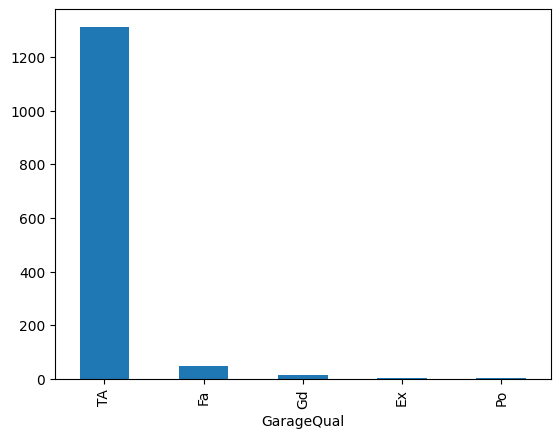

In [274]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [275]:
df['GarageQual1'] = df['GarageQual'].fillna('Missing')
df['FireplaceQu1'] = df['FireplaceQu'].fillna('Missing')

<Axes: xlabel='GarageQual1'>

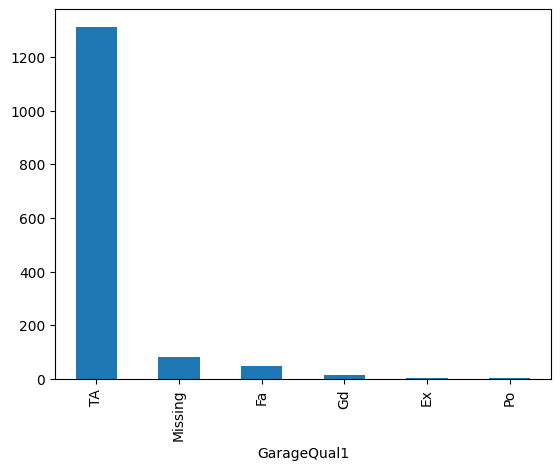

In [276]:
df['GarageQual1'].value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='FireplaceQu1'>

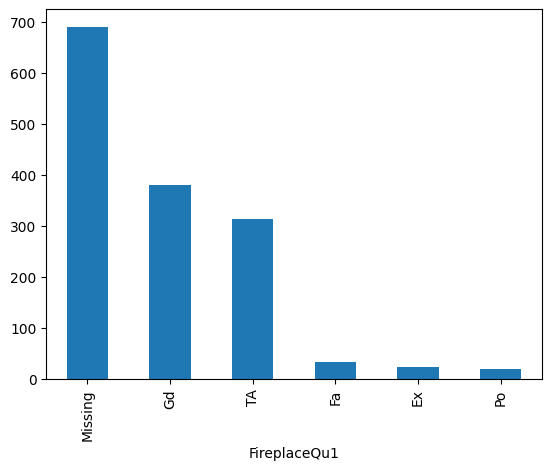

In [277]:
df['FireplaceQu1'].value_counts().sort_values(ascending=False).plot(kind='bar') # Just taken as an example

In [278]:
df.sample(10)

,GarageQual,FireplaceQu,SalePrice,GarageQual1,FireplaceQu1
507,TA,NaN,208300,TA,Missing
617,TA,NaN,105500,TA,Missing
58,TA,Gd,438780,TA,Gd
928,TA,TA,236500,TA,TA
125,NaN,NaN,84500,Missing,Missing
825,TA,Gd,385000,TA,Gd
1169,TA,TA,625000,TA,TA
384,TA,Fa,240000,TA,Fa
600,TA,Gd,275000,TA,Gd
747,TA,Gd,265979,TA,Gd


In [279]:
x = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [280]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [281]:
x_train

,GarageQual,FireplaceQu,GarageQual1,FireplaceQu1
455,TA,TA,TA,TA
863,TA,NaN,TA,Missing
504,TA,Fa,TA,Fa
1413,TA,Gd,TA,Gd
1389,TA,Gd,TA,Gd
...,...,...,...,...
466,TA,Po,TA,Po
299,TA,Gd,TA,Gd
493,TA,Fa,TA,Fa
527,TA,Gd,TA,Gd


In [282]:
trf = ColumnTransformer([
    ('impute',SimpleImputer(strategy='constant',fill_value='Missing'),['GarageQual','FireplaceQu'])

],remainder='passthrough')

In [283]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute',
                                 SimpleImputer(fill_value='Missing',
                                               strategy='constant'),
                                 ['GarageQual', 'FireplaceQu'])])

In [284]:
x_train = trf.fit_transform(x_train)
x_test = trf.transform(x_test)

In [285]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [286]:
x_train.isnull().mean()

,0
0,0.0
1,0.0
2,0.0
3,0.0
